In [1]:
!pip install  dgl -f https://data.dgl.ai/wheels/torch-2.3/cu121/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.3/cu121/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.

In [2]:
#install category encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [3]:
#Installs DGL Python package for deep learning graph operations.y
!pip install dgl

In [4]:
!apt-get update
!apt-get install -y nvidia-cuda-toolkit

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.4 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [929 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [5]:
import dgl.nn as dglnn
from dgl import from_networkx
import torch.nn as nn
import torch as th
import torch.nn.functional as F
import dgl.function as fn
import networkx as nx
import pandas as pd
import socket
import struct
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [6]:
#Reads CSV data into a pandas DataFrame from 'NF-BoT-IoT.csv' file.
data = pd.read_csv('/content/cic_iot_2023_new_dataset.csv')

In [7]:
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.137.163,52486,47.254.83.84,1340,6,0,0.0,0.0,1,2,2,111330,1,DDoS
1,192.168.137.163,52486,47.254.83.84,1340,6,0,0.0,0.0,4,0,16,219782,1,DDoS
2,192.168.137.48,35527,51.145.143.28,443,6,0,5673.0,146760.0,57,107,2,1330250,1,DDoS
3,51.145.143.28,443,192.168.137.48,35527,6,0,0.0,600.0,2,28,16,338437,1,DDoS
4,192.168.137.38,36974,172.217.13.163,80,6,0,635.0,1595.0,11,6,16,13753507,1,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415515,192.168.137.133,44207,192.168.137.1,53,17,0,86.0,0.0,2,0,0,123130,0,Benign
415516,192.168.137.227,56822,8.8.4.4,53,17,0,124.0,0.0,2,0,0,143952,0,Benign
415517,192.168.137.249,53,192.168.137.1,40737,17,0,148.0,164.0,1,1,0,1383,0,Benign
415518,192.168.137.51,55221,192.168.137.1,53,17,0,300.0,0.0,5,0,0,9166143,0,Benign


In [8]:
#Assigns random IPv4 addresses to 'IPV4_SRC_ADDR' column in DataFrame.
data['IPV4_SRC_ADDR'] = data.IPV4_SRC_ADDR.apply(lambda x: socket.inet_ntoa(struct.pack('>I', random.randint(0xac100001, 0xac1f0001))))

In [9]:
#Converts specified columns in DataFrame to string data type.

data['IPV4_SRC_ADDR'] = data.IPV4_SRC_ADDR.apply(str)
data['L4_SRC_PORT'] = data.L4_SRC_PORT.apply(str)
data['IPV4_DST_ADDR'] = data.IPV4_DST_ADDR.apply(str)
data['L4_DST_PORT'] = data.L4_DST_PORT.apply(str)

In [10]:
#Combines IP addresses and port numbers into single string format.
data['IPV4_SRC_ADDR'] = data['IPV4_SRC_ADDR'] + ':' + data['L4_SRC_PORT']
data['IPV4_DST_ADDR'] = data['IPV4_DST_ADDR'] + ':' + data['L4_DST_PORT']

In [11]:
#remove 'L4_SRC_PORT' and 'L4_DST_PORT' columns from DataFrame 'data'.
data.drop(columns=['L4_SRC_PORT','L4_DST_PORT'],inplace=True)

In [12]:
data

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.30.117.25:52486,47.254.83.84:1340,6,0,0.0,0.0,1,2,2,111330,1,DDoS
1,172.26.172.220:52486,47.254.83.84:1340,6,0,0.0,0.0,4,0,16,219782,1,DDoS
2,172.24.118.246:35527,51.145.143.28:443,6,0,5673.0,146760.0,57,107,2,1330250,1,DDoS
3,172.17.55.23:443,192.168.137.48:35527,6,0,0.0,600.0,2,28,16,338437,1,DDoS
4,172.25.136.26:36974,172.217.13.163:80,6,0,635.0,1595.0,11,6,16,13753507,1,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...
415515,172.18.124.79:44207,192.168.137.1:53,17,0,86.0,0.0,2,0,0,123130,0,Benign
415516,172.18.241.251:56822,8.8.4.4:53,17,0,124.0,0.0,2,0,0,143952,0,Benign
415517,172.21.28.201:53,192.168.137.1:40737,17,0,148.0,164.0,1,1,0,1383,0,Benign
415518,172.22.161.159:55221,192.168.137.1:53,17,0,300.0,0.0,5,0,0,9166143,0,Benign


In [13]:
#This code renames the 'Attack' column to 'label' in the DataFrame.
data.rename(columns={"Attack": "label"},inplace = True)

In [14]:
#Converts categorical labels to numerical values using LabelEncoder in scikit-learn.
le = LabelEncoder()
le.fit_transform(data.label.values)
data['label'] = le.transform(data['label'])

In [15]:
# Assigning the 'label' attribute from the 'data' object to the variable 'label'
label = data.label

In [16]:
# Removing the 'label' column from the DataFrame 'data' in place
data.drop(columns=['label'],inplace = True)

In [17]:
# Creating a StandardScaler instance for feature standardization or normalization
scaler = StandardScaler()

In [18]:
# Concatenating the 'data' DataFrame and 'label' object along the columns (axis=1)
data =  pd.concat([data, label], axis=1)

In [19]:
data

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,label
0,172.30.117.25:52486,47.254.83.84:1340,6,0,0.0,0.0,1,2,2,111330,1,1
1,172.26.172.220:52486,47.254.83.84:1340,6,0,0.0,0.0,4,0,16,219782,1,1
2,172.24.118.246:35527,51.145.143.28:443,6,0,5673.0,146760.0,57,107,2,1330250,1,1
3,172.17.55.23:443,192.168.137.48:35527,6,0,0.0,600.0,2,28,16,338437,1,1
4,172.25.136.26:36974,172.217.13.163:80,6,0,635.0,1595.0,11,6,16,13753507,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415515,172.18.124.79:44207,192.168.137.1:53,17,0,86.0,0.0,2,0,0,123130,0,0
415516,172.18.241.251:56822,8.8.4.4:53,17,0,124.0,0.0,2,0,0,143952,0,0
415517,172.21.28.201:53,192.168.137.1:40737,17,0,148.0,164.0,1,1,0,1383,0,0
415518,172.22.161.159:55221,192.168.137.1:53,17,0,300.0,0.0,5,0,0,9166143,0,0


In [20]:
# Splitting the dataset into training and testing sets with 70% for training and 30% for testing
# Setting a random seed (random_state=123) for reproducibility and using stratified sampling based on the 'label'
X_train, X_test, y_train, y_test = train_test_split(
     data, label, test_size=0.3, random_state=123,stratify= label)

In [21]:
# Display the transformed training data after target encoding
print(X_train)

               IPV4_SRC_ADDR         IPV4_DST_ADDR  PROTOCOL  L7_PROTO  \
327416   172.28.225.235:5353      224.0.0.251:5353        17         0   
404419  172.28.224.166:51015            8.8.8.8:53        17         0   
395434  172.19.255.226:33225      192.168.137.1:53        17         0   
98104    172.16.138.88:52071       74.125.0.104:80         6         0   
294379  172.20.227.117:33167      52.31.95.139:443         6         0   
...                      ...                   ...       ...       ...   
39056     172.23.91.246:7711  192.168.137.233:4070         6         0   
199915  172.25.122.140:49155  255.255.255.255:6667        17         0   
284014   172.17.19.217:40176    54.164.163.115:443         6         0   
107599   172.20.222.82:46618    192.168.137.131:80         6        80   
7936       172.28.184.3:1884  192.168.137.132:8080         6         0   

        IN_BYTES  OUT_BYTES  IN_PKTS  OUT_PKTS  TCP_FLAGS  \
327416     151.0     5371.0        1        17    

In [22]:
# Normalizing selected numerical columns in the training data using the StandardScaler
# The selected columns exclude 'label' to avoid scaling the target variable
cols_to_norm = list(set(list(X_train.iloc[:, 2:].columns ))  - set(list(['label'])) )
X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])

In [23]:
# Creating a new column 'h' in the training data containing lists of values from normalized numerical columns
X_train['h'] = X_train[ cols_to_norm ].values.tolist()

In [24]:
X_train

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,label,h
327416,172.28.225.235:5353,224.0.0.251:5353,1.236885,-0.225190,-0.013122,-0.017587,-0.051923,-0.017080,-0.467042,1.899441,-0.964383,0,"[-0.9643832410231985, -0.017586658626511504, -..."
404419,172.28.224.166:51015,8.8.8.8:53,1.236885,-0.225190,-0.012534,-0.029559,-0.043935,-0.020235,-0.467042,-0.703067,-0.964383,0,"[-0.9643832410231985, -0.029559027121514703, -..."
395434,172.19.255.226:33225,192.168.137.1:53,1.236885,-0.225190,-0.013585,-0.029559,-0.043935,-0.020235,-0.467042,-0.703748,-0.964383,0,"[-0.9643832410231985, -0.029559027121514703, -..."
98104,172.16.138.88:52071,74.125.0.104:80,-0.765186,-0.225190,-0.014306,20.695164,60.756059,1.179711,-0.332744,-0.434317,1.036932,4,"[1.0369321629220896, 20.695163648637006, -0.33..."
294379,172.20.227.117:33167,52.31.95.139:443,-0.765186,-0.225190,-0.014306,-0.029559,-0.011981,-0.020235,0.607339,-0.704104,-0.964383,0,"[-0.9643832410231985, -0.029559027121514703, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39056,172.23.91.246:7711,192.168.137.233:4070,-0.765186,-0.225190,-0.014306,-0.029559,-0.051923,-0.019307,1.144530,1.837492,1.036932,1,"[1.0369321629220896, -0.029559027121514703, 1...."
199915,172.25.122.140:49155,255.255.255.255:6667,1.236885,-0.225190,-0.012958,-0.023041,-0.051923,-0.017080,-0.467042,1.477374,1.036932,4,"[1.0369321629220896, -0.023041208190330686, -0..."
284014,172.17.19.217:40176,54.164.163.115:443,-0.765186,-0.225190,0.024531,-0.006452,0.075892,-0.015966,-0.332744,-0.700478,-0.964383,0,"[-0.9643832410231985, -0.006452422798445783, -..."
107599,172.20.222.82:46618,192.168.137.131:80,-0.765186,4.440694,0.016410,-0.000394,0.003996,-0.016894,-0.332744,0.855231,1.036932,2,"[1.0369321629220896, -0.00039379357308389504, ..."


In [25]:
# Creating a MultiGraph 'G' from the edges of the DataFrame 'X_train'
# Nodes are identified by 'IPV4_SRC_ADDR' and 'IPV4_DST_ADDR', and edge attributes include 'h' and 'label'
G = nx.from_pandas_edgelist(X_train, "IPV4_SRC_ADDR", "IPV4_DST_ADDR", ['h','label'],create_using=nx.MultiGraph())

In [26]:
print(G)

MultiGraph with 335640 nodes and 290864 edges


In [27]:
# Converting the graph 'G' from undirected to directed
G = G.to_directed()

In [28]:
print(G)

MultiDiGraph with 335640 nodes and 581728 edges


In [29]:
# Creating a DGLGraph from the NetworkX graph 'G' while retaining edge attributes 'h' and 'label'
G = from_networkx(G,edge_attrs=['h','label'] )

In [30]:
print(G)

Graph(num_nodes=335640, num_edges=581728,
      ndata_schemes={}
      edata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)})


In [31]:

# Assigning a tensor of ones to the 'h' node attribute in the DGLGraph 'G'
# The tensor shape matches the number of nodes and the number of columns in the 'h' edge attribute
G.ndata['h'] = th.ones(G.num_nodes(), G.edata['h'].shape[1])

In [32]:
print(G)

Graph(num_nodes=335640, num_edges=581728,
      ndata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32)}
      edata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)})


In [33]:
# Assigning a tensor of True values to the 'train_mask' edge attribute in the DGLGraph 'G'
# The tensor length matches the number of edges in the graph
G.edata['train_mask'] = th.ones(len(G.edata['h']), dtype=th.bool)

In [34]:
print(G)

Graph(num_nodes=335640, num_edges=581728,
      ndata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32)}
      edata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool)})


In [35]:
# Accessing the values stored in the 'train_mask' edge attribute of the DGLGraph 'G'
G.edata['train_mask']

tensor([True, True, True,  ..., True, True, True])

In [36]:
print(G)

Graph(num_nodes=335640, num_edges=581728,
      ndata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32)}
      edata_schemes={'h': Scheme(shape=(9,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool)})


In [37]:
# Compute accuracy by comparing the model's predicted class indices with the actual labels
# The result is the mean accuracy across all samples
def compute_accuracy(pred, labels):
    return (pred.argmax(1) == labels).float().mean().item()

In [38]:
# Definition of a single GraphSAGE layer module
class SAGELayer(nn.Module):
    def __init__(self, ndim_in, edims, ndim_out, activation):
        super(SAGELayer, self).__init__()
        # Weight matrix for message aggregation, combining node and edge features
        ### force to outut fix dimensions
        self.W_msg = nn.Linear(ndim_in + edims, ndim_out)
        ### apply weight
        # Weight matrix for updating node features based on aggregated messages
        self.W_apply = nn.Linear(ndim_in + ndim_out, ndim_out)
        self.activation = activation

    def message_func(self, edges):
        # Message function for aggregating information from neighboring nodes and edges
        return {'m': self.W_msg(th.cat([edges.src['h'], edges.data['h']], 2))}

    def forward(self, g_dgl, nfeats, efeats):
        with g_dgl.local_scope():
            g = g_dgl
            g.ndata['h'] = nfeats
            g.edata['h'] = efeats
            # Eq4
            # Equation 4: Aggregating messages from neighbors
            g.update_all(self.message_func, fn.mean('m', 'h_neigh'))
            # Eq5
            # Equation 5: Updating node features with aggregated messages
            g.ndata['h'] = F.relu(self.W_apply(th.cat([g.ndata['h'], g.ndata['h_neigh']], 2)))
            return g.ndata['h']

# Definition of the overall GraphSAGE model
class SAGE(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout):
        super(SAGE, self).__init__()
        # List to store the GraphSAGE layers
        self.layers = nn.ModuleList()
        # First GraphSAGE layer with input dimensions, edge dimensions, output dimensions, and activation function
        self.layers.append(SAGELayer(ndim_in, edim, 128, activation))
        # Second GraphSAGE layer with adjusted input and output dimensions
        self.layers.append(SAGELayer(128, edim, ndim_out, activation))
        # Dropout layer for regularization
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, g, nfeats, efeats):
      # Forward pass through each GraphSAGE layer
        for i, layer in enumerate(self.layers):
            if i != 0:
                nfeats = self.dropout(nfeats)
            # Update node features using the current GraphSAGE layer
            nfeats = layer(g, nfeats, efeats)
            # Summing node features along the second dimension (across nodes) for the final output
        return nfeats.sum(1)

In [39]:
# Definition of a Multi-Layer Perceptron (MLP) Predictor module for graph edge scoring
class MLPPredictor(nn.Module):
    def __init__(self, in_features, out_classes):
        super().__init__()
        # Fully connected layer to compute scores based on concatenated node features
        self.W = nn.Linear(in_features * 2, out_classes)

    def apply_edges(self, edges):
      # Extracting node features from source and destination nodes
        h_u = edges.src['h']
        h_v = edges.dst['h']
        # Concatenating node features and passing through the fully connected layer
        score = self.W(th.cat([h_u, h_v], 1))
        return {'score': score}

    def forward(self, graph, h):
        with graph.local_scope():
          # Setting node features in the graph to input features 'h'
            graph.ndata['h'] = h
            # Applying the 'apply_edges' function to compute scores for each edge
            graph.apply_edges(self.apply_edges)
             # Returning the computed scores for each edge
            return graph.edata['score']

In [40]:
# Reshaping node features in the DGLGraph 'G' to have an additional dimension
G.ndata['h'] = th.reshape(G.ndata['h'], (G.ndata['h'].shape[0], 1,G.ndata['h'].shape[1]))
# Reshaping edge features in the DGLGraph 'G' to have an additional dimension
G.edata['h'] = th.reshape(G.edata['h'], (G.edata['h'].shape[0], 1,G.edata['h'].shape[1]))

In [41]:
# Definition of a complete neural network model
class Model(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout):
        super().__init__()
        # GraphSAGE layer for node feature processing
        self.gnn = SAGE(ndim_in, ndim_out, edim, activation, dropout)
        # MLP predictor for edge scoring
        self.pred = MLPPredictor(ndim_out, 5)
    def forward(self, g, nfeats, efeats):
      # Forward pass through the GraphSAGE layer
        h = self.gnn(g, nfeats, efeats)
         # Forward pass through the MLP predictor to obtain edge scores
        return self.pred(g, h)

In [42]:
# Computing class weights for balanced class distribution
# This is useful for handling class imbalance in machine learning tasks
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(G.edata['label'].cpu().numpy()),
                                                 y = G.edata['label'].cpu().numpy())

In [43]:
# Defining CrossEntropyLoss criterion for a classification task with class weights
# Class weights are applied to handle imbalanced class distribution during training
import torch as th
class_weights = th.FloatTensor(class_weights).cuda()
criterion = nn.CrossEntropyLoss(weight = class_weights)

In [44]:
#pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html

In [45]:
#pip list|grep dgl

In [46]:
#pip uninstall dgl

In [47]:
#pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html

In [48]:
#pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

In [49]:
import dgl
# G = dgl.DGLGraph()
G = G.to('cuda:0')
print(G.device)

cuda:0


In [50]:
#G = G.to('cuda:0')
#G.device

In [51]:
G.ndata['h'].device

device(type='cuda', index=0)

In [52]:
G.edata['h'].device

device(type='cuda', index=0)

In [53]:
# Training loop for the neural network model on the graph 'G'
node_features = G.ndata['h']
edge_features = G.edata['h']

edge_label = G.edata['label']
train_mask = G.edata['train_mask']
# Initializing the neural network model, loss criterion, and optimizer
model = Model(G.ndata['h'].shape[2], 128, G.ndata['h'].shape[2], F.relu, 0.2).cuda()
opt = th.optim.Adam(model.parameters())
# Training loop
for epoch in range(1,8000):
  # Forward pass: predicting edge labels with the model
    pred = model(G, node_features,edge_features).cuda()
    # Computing the loss using the defined criterion
    loss = criterion(pred[train_mask] ,edge_label[train_mask])
    # Backward pass: computing gradients and performing optimization step
    opt.zero_grad()
    loss.backward()
    opt.step()
    # Printing training accuracy at regular intervals
    if epoch % 100 == 0:
      print('Training acc:', compute_accuracy(pred[train_mask], edge_label[train_mask]))

Training acc: 0.8316361308097839
Training acc: 0.8846505880355835
Training acc: 0.8940175175666809
Training acc: 0.8943939805030823
Training acc: 0.8946226239204407
Training acc: 0.8959771990776062
Training acc: 0.8974865078926086
Training acc: 0.8967283964157104
Training acc: 0.8966441750526428
Training acc: 0.898514449596405
Training acc: 0.8978027701377869
Training acc: 0.8996352553367615
Training acc: 0.8990060687065125
Training acc: 0.8992570638656616
Training acc: 0.8995957374572754
Training acc: 0.9000478386878967
Training acc: 0.9000805020332336
Training acc: 0.9008952975273132
Training acc: 0.9003555178642273
Training acc: 0.9003675580024719
Training acc: 0.9012923836708069
Training acc: 0.9011049866676331
Training acc: 0.9016723036766052
Training acc: 0.9006649255752563
Training acc: 0.9031592607498169
Training acc: 0.9018235802650452
Training acc: 0.9029512405395508
Training acc: 0.9022636413574219
Training acc: 0.9042989611625671
Training acc: 0.902468204498291
Training acc

In [56]:
# Scaling selected numerical columns in the test data (X_test) using the previously fitted scaler
X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

In [57]:
X_test

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,label
138384,172.25.25.34:37125,192.168.137.199:80,-0.765186,-0.22519,-0.014306,-0.029559,-0.051923,-0.020050,-0.467042,0.762693,1.036932,2
174321,172.26.18.36:443,192.168.137.129:61461,-0.765186,-0.22519,-0.014306,-0.029559,-0.051923,-0.020050,0.674488,-0.608628,1.036932,3
258998,172.20.77.61:443,192.168.137.41:49812,-0.765186,-0.22519,-0.014306,-0.029543,-0.051923,-0.019864,0.607339,-0.706723,-0.964383,0
143535,172.28.208.162:9461,192.168.137.199:80,-0.765186,-0.22519,-0.014306,-0.029559,-0.043935,-0.020235,-0.467042,-0.675908,1.036932,2
263459,172.24.131.134:40719,192.168.137.1:53,1.236885,-0.22519,-0.013742,-0.029559,-0.043935,-0.020235,-0.467042,-0.702859,-0.964383,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13419,172.30.161.81:443,192.168.137.94:48091,-0.765186,-0.22519,-0.014306,-0.029543,-0.051923,-0.019864,0.607339,-0.706695,1.036932,1
281275,172.17.123.31:80,192.168.137.41:32840,-0.765186,-0.22519,-0.014306,-0.028723,-0.051923,-0.019864,0.607339,-0.706730,-0.964383,0
64410,172.27.39.200:4979,192.168.137.123:4070,-0.765186,-0.22519,-0.014306,-0.029559,-0.051923,-0.018008,-0.467042,1.896346,1.036932,1
40656,172.21.108.30:1840,192.168.137.5:4070,-0.765186,-0.22519,-0.014306,-0.029559,-0.051923,-0.020050,-0.131298,-0.453761,1.036932,1


In [58]:
# Creating a new column 'h' in the test data containing lists of values from normalized numerical columns
X_test['h'] = X_test[ cols_to_norm ].values.tolist()

In [59]:
# Creating a test graph 'G_test' from the test dataset 'X_test'
G_test = nx.from_pandas_edgelist(X_test, "IPV4_SRC_ADDR", "IPV4_DST_ADDR", ['h','label'],create_using=nx.MultiGraph())
# Converting the test graph to a directed graph
G_test = G_test.to_directed()
# Converting the test graph to a DGLGraph while retaining edge attributes 'h' and 'label'
G_test = from_networkx(G_test,edge_attrs=['h','label'] )
# Extracting actual labels from the test graph
actual = G_test.edata.pop('label')
# Setting node features in the test graph with a tensor of ones
G_test.ndata['feature'] = th.ones(G_test.num_nodes(), G.ndata['h'].shape[2])

In [60]:
# Reshaping node features in the test graph 'G_test' to have an additional dimension
G_test.ndata['feature'] = th.reshape(G_test.ndata['feature'], (G_test.ndata['feature'].shape[0], 1, G_test.ndata['feature'].shape[1]))

In [61]:
# Reshaping edge features in the test graph 'G_test' to have an additional dimension
G_test.edata['h'] = th.reshape(G_test.edata['h'], (G_test.edata['h'].shape[0], 1, G_test.edata['h'].shape[1]))

In [62]:
# Moving the test graph 'G_test' to the CUDA device with index 0 for GPU acceleration
G_test = G_test.to('cuda:0')

In [63]:
import timeit
# Measuring the time taken for making predictions on the test data
start_time = timeit.default_timer()
# Extracting node and edge features from the test graph 'G_test'
node_features_test = G_test.ndata['feature']
edge_features_test = G_test.edata['h']
# Making predictions using the trained model for the test data
test_pred = model(G_test, node_features_test, edge_features_test).cuda()
# Calculating the elapsed time for making predictions
elapsed = timeit.default_timer() - start_time

In [64]:
# Printing the elapsed time for making predictions on the test data
print(str(elapsed) + ' seconds')

0.011515041000166093 seconds


In [65]:
# Selecting the predicted class indices with the highest probability for each sample in the test predictions
test_pred = test_pred.argmax(1)

In [66]:
# Moving the PyTorch tensor 'test_pred' from GPU to CPU, detaching it, and converting to a NumPy array
test_pred = th.Tensor.cpu(test_pred).detach().numpy()

In [67]:
# Inverse transforming encoded labels back to their original class labels
actual = le.inverse_transform(actual)
test_pred = le.inverse_transform(test_pred)

In [68]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [69]:
!pip install scikit-learn matplotlib


In [70]:
# Importing libraries for creating a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [71]:
!pip install scikit-learn

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [74]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

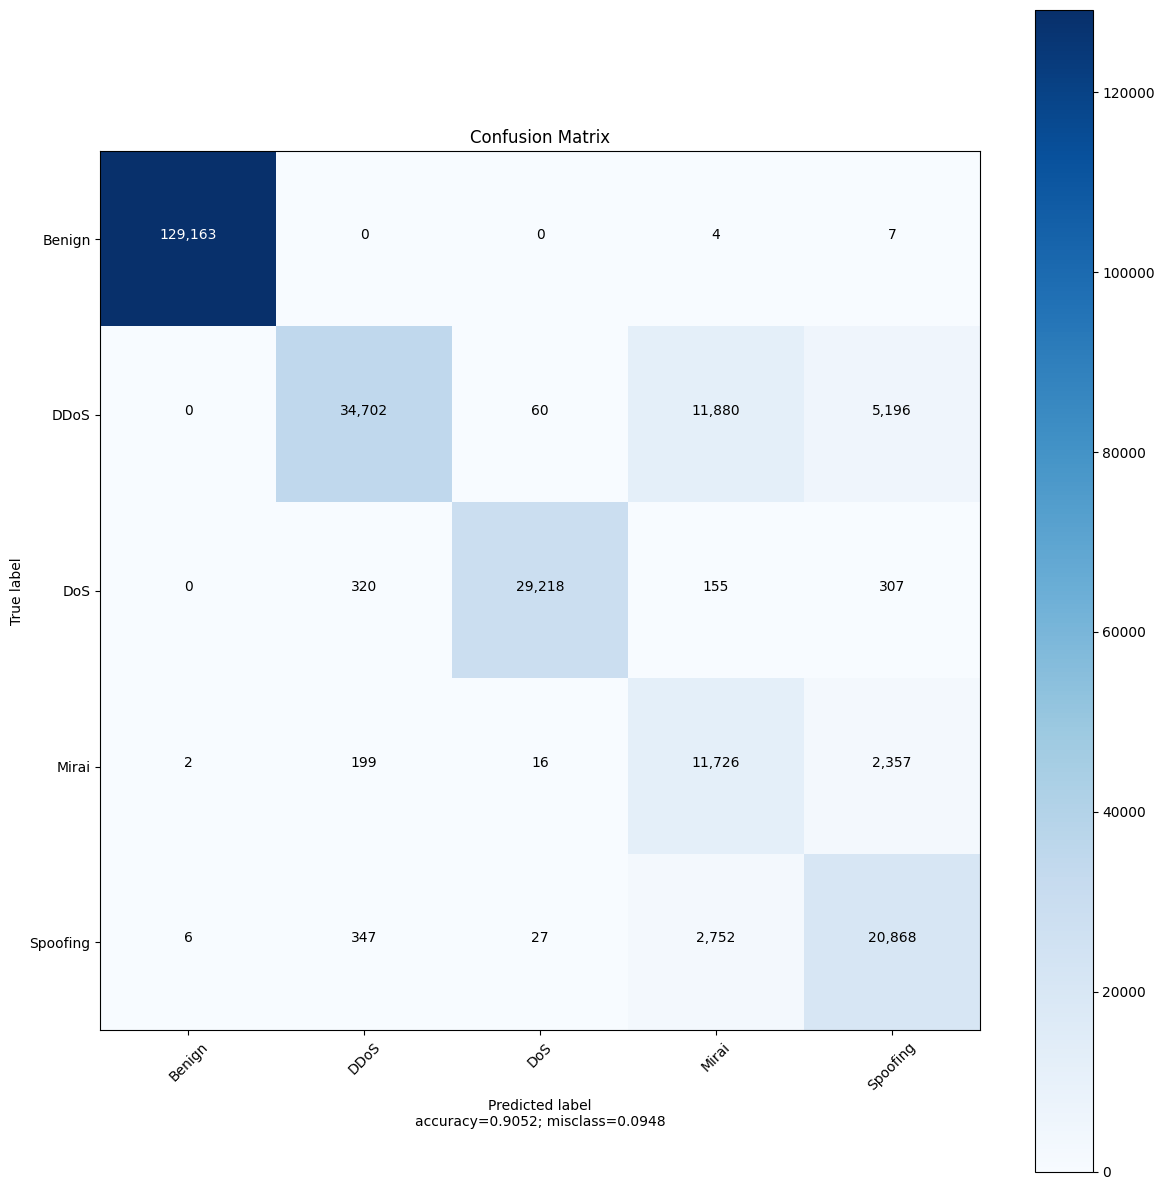

In [75]:
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(cm = confusion_matrix(actual, test_pred),
                      normalize    = False,
                      target_names = np.unique(actual),
                      title        = "Confusion Matrix")